# If Working on colab

In [ ]:
#Run when first Starting to create the repo in drive. Then close notebook and use the one created in your drive
'''
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive
! git clone https://github.com/RafaelParker34/Optogenetics23.git
'''
#This will always need to run
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/My Drive/Optogenetics23/')
!pip install statannotations

In [1]:
from PreProcess import PreProcess
from PreProcessIndividual import PreProcessIndividual
import Graphing
import os

# Variable Definition

In [5]:
group = ''
path = '/content/drive/My Drive/Optogenetics23/Data/' #Path to data directory

relevantLabels = ['Nose','Spine','TB'] # Labels to be used for angle calculation
arenaPixels = 410 #Single side of the box measured in pixels
arenaCm = 50 #Single side of the box measured in Cm
pixelLength = arenaCm/arenaPixels
frameRate = 25 #Video framerate
cutoffProb = 0.7 #Labels without this confidence will be discarded
distanceThresh = 0.2 #Distance a mouse is required to move in one frame to count as moving


stimTimesDict = {
    '0510':[[2,4,6],[2,7]],
    '0513':[[2,4,6],[2,7]],
    '2435':[[2,4,6],[1,9]],
    '2438':[[5,10,15],[0,0]]} #[stimulation on (min), stimulation off (min),totalvideolength (min)], [light on (sec),light off(sec)]

conditionDict = {
    '0510':'M1_ChRmine',
    '0513':'M1_GtACR1',
    '2435':'Str_Chrimson',
    '2438':'Str_OPN3'} #For output labeling purposes

In [3]:
# For a Single Mouse
#Only initiates the preprocessing object for individual steps to be used

mouse = '0510'

stimTimes = [i*60*frameRate for i in stimTimesDict[mouse][0]] #Changes these measures from minutes to frames
stimPattern = [i*25 for i in stimTimesDict[mouse][1]]

dataPath = path+mouse+group'.csv'
savePath = path+mouse+group'_Report.pdf'
mouseData = PreProcessIndividual(pixelLength,frameRate,cutoffProb,relevantLabels,stimTimes,distanceThresh,mouse,stimPattern)
mouseData.importDLC(dataPath) #imports and cleans the DLC output csv

# PreProcessing

In [4]:
#First we must remove any low annotation-conficence frames.
#This filtered data will be our main information going forward
numberOutliers = mouseData.cleanOutliers()

In [5]:
#Finding the distance traveled and speed per frame of our clean data
distanceCm, speedCmSec = mouseData.distanceTraveled()

In [6]:
#Determining the angle of each turn while the animal is moving
# Seven possible categories: Straight,Left-Broad,Left-Medium,Left-Sharp,Right-Broad....
angleJudgements = mouseData.turnAngle()

In [7]:
#Our initial stimulation times (in frames) are not out of line with our cleaned data and we must align them
shiftedFrames = mouseData.alignOutliers()

# Plotting

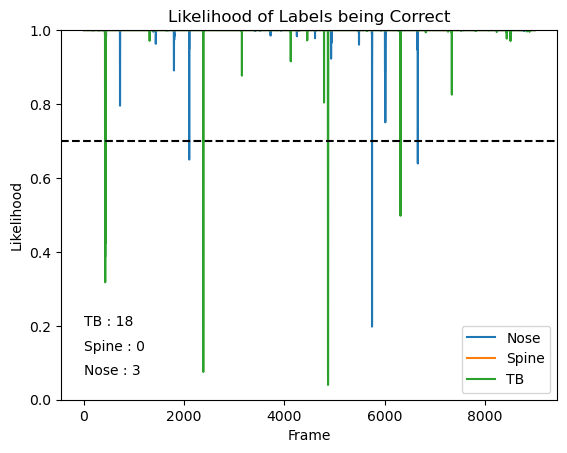

In [8]:
#Visualize how well DLC did and how many frames had to be dropped
likelihood = Graphing.plotLikelihood(mouseData)

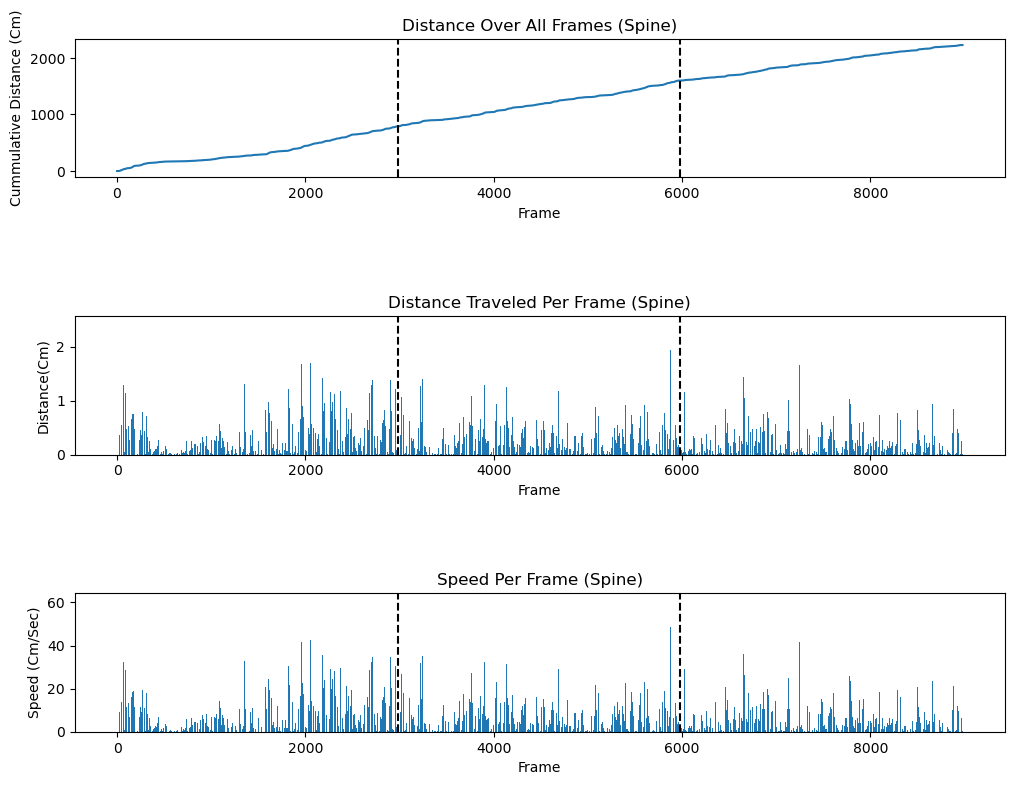

In [9]:
#visualize the Distance and Speed over the entire session
#Takes a while for drawing thousands of different lines: could be done much better with lineCollection but...
distance = Graphing.plotDistance(mouseData)

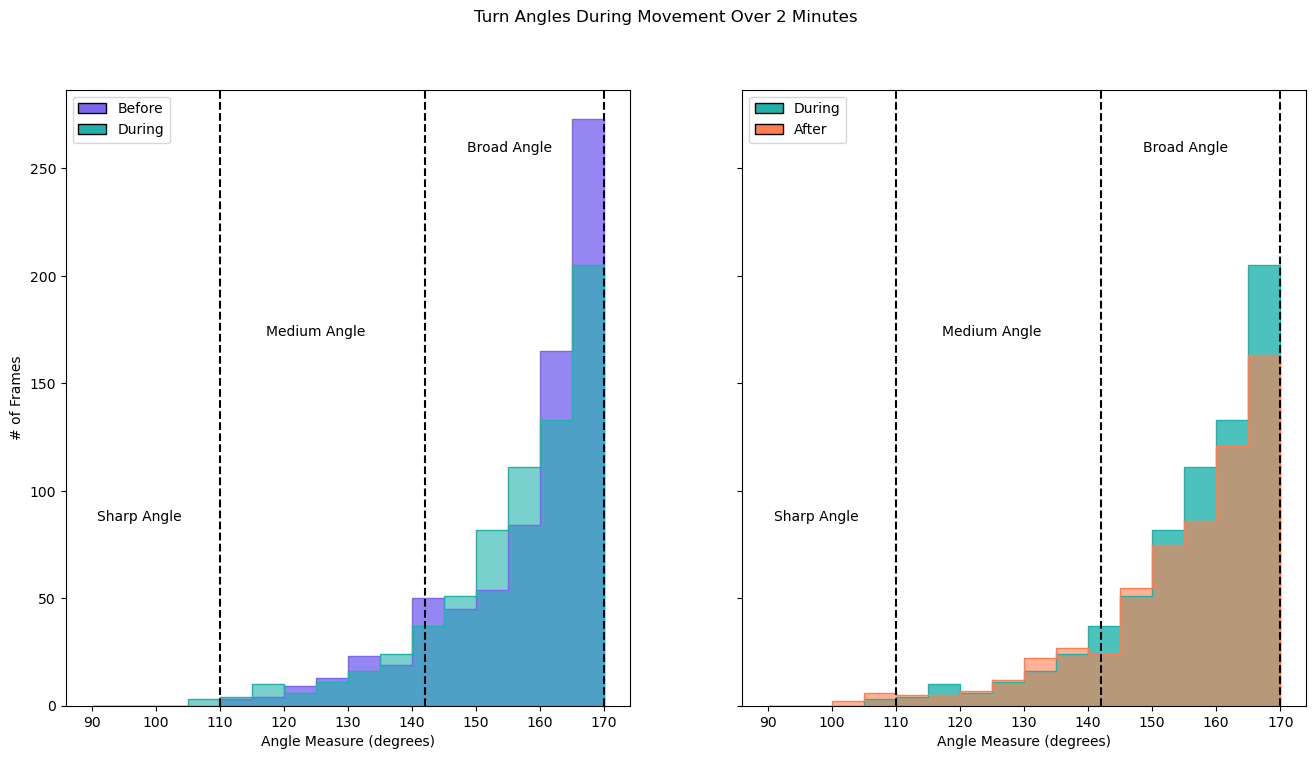

In [10]:
#Visualize the turning done before,during, and after stimulation
turning = Graphing.plotTurning(mouseData)

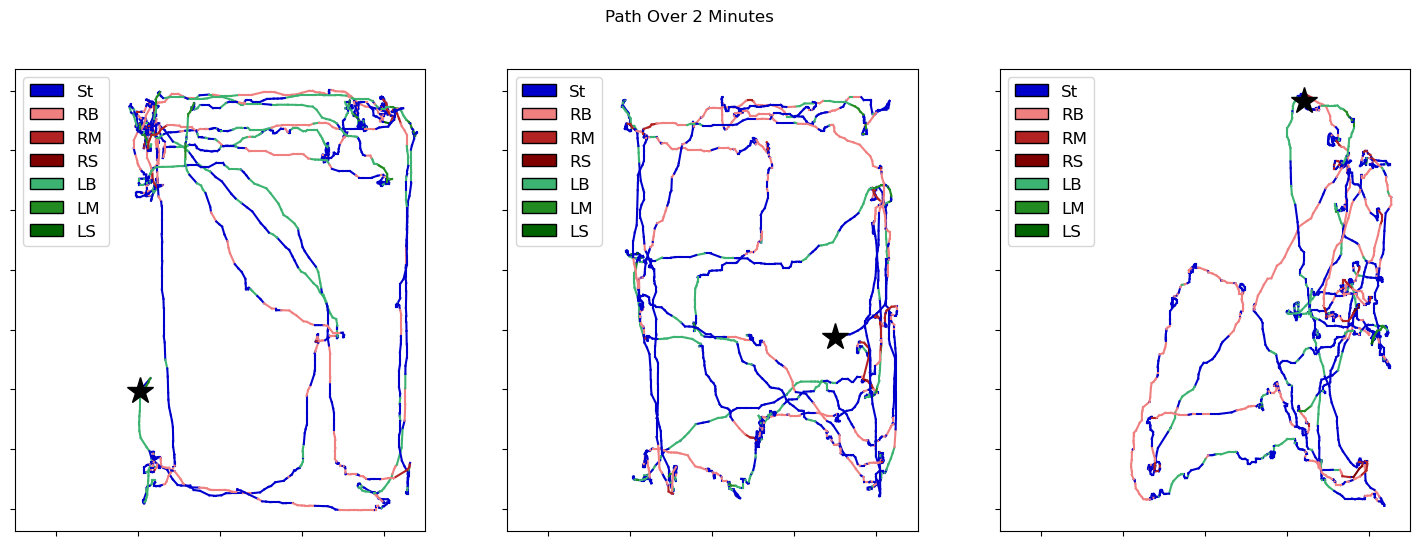

In [11]:
#Visualize the mouse's path before,during, and after stimulation
#Also takes a while...and could be solved with line collection
path = Graphing.plotPath(mouseData)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Before vs. During: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
During vs. After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
Before vs. After: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01


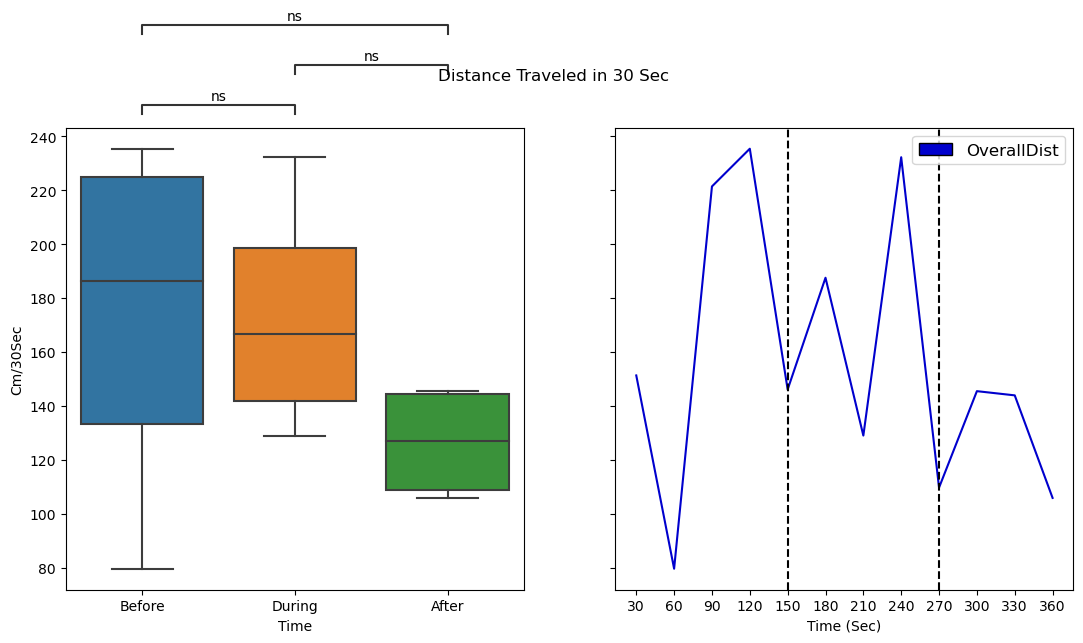

In [12]:
#Quantify the distance traveled before, during, and after stimulation
turningTime = Graphing.overallDist(mouseData)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Right_During vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
Left_Before vs. Left_During: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
Left_During vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:6.857e-01 U_stat=1.000e+01
Right_Before vs. Right_During: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=7.000e+00
Right_Before vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
Left_Before vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
Left_After vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.465e-01 U_stat=2.500e+00
Left_Before vs. Right_Before: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=7.500e+00
Left_During vs. R

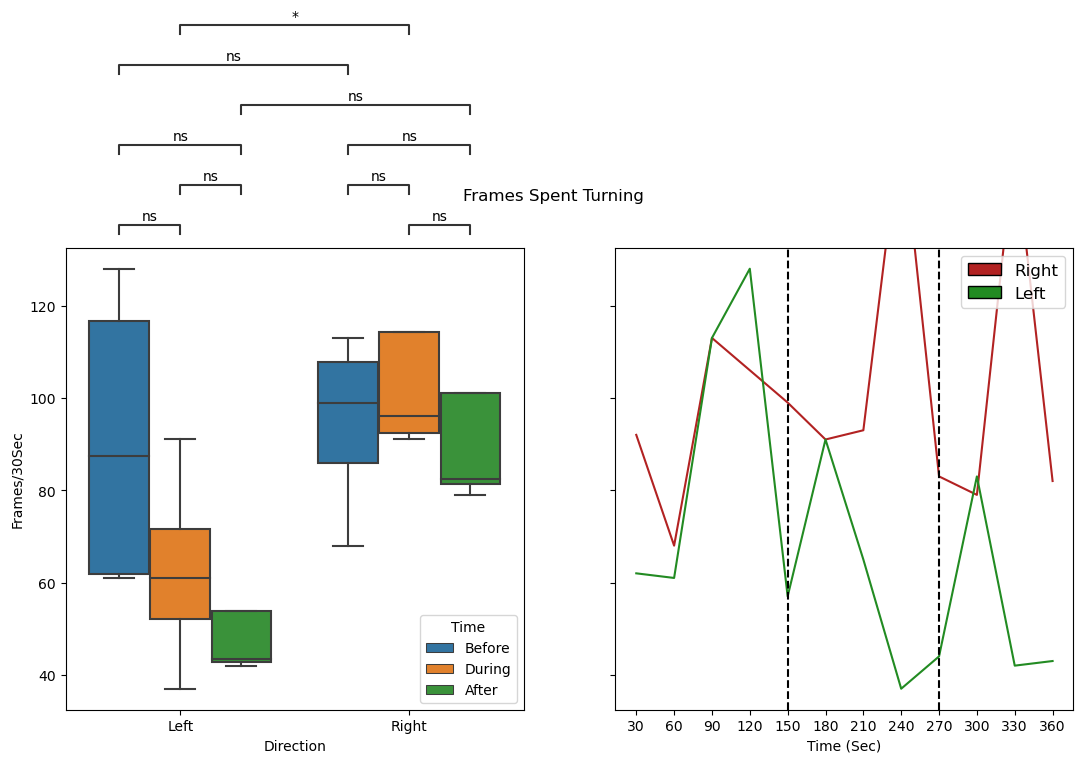

In [13]:
#Quantify the amount of time spent turing in either direction before, during, and after stimulation
turningTime = Graphing.timeTurning(mouseData)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Right_During vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
Left_Before vs. Left_During: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=7.000e+00
Left_During vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
Right_Before vs. Right_During: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
Right_Before vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:4.857e-01 U_stat=1.100e+01
Left_Before vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:6.857e-01 U_stat=1.000e+01
Left_After vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=3.000e+00
Left_Before vs. Right_Before: Mann-Whitney-Wilcoxon test two-sided, P_val:6.857e-01 U_stat=6.000e+00
Left_During vs. R

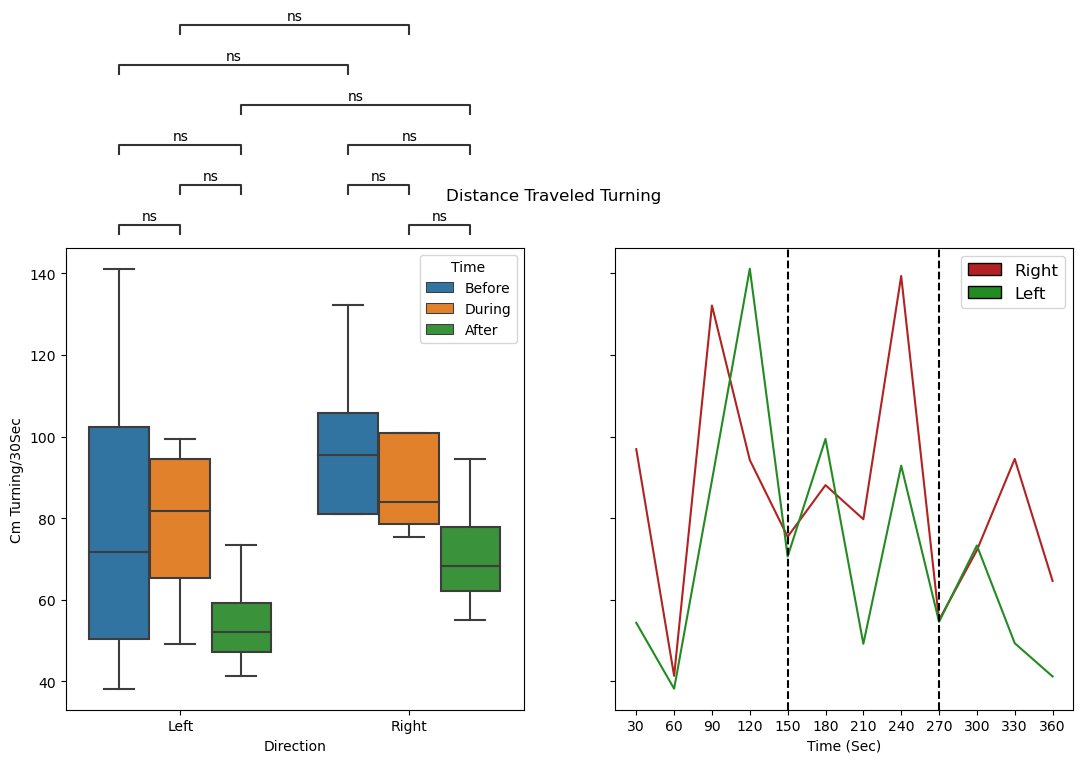

In [14]:
#Quantify the the distance traveled turing in either direction before, during, and after stimulation
turningDist = Graphing.distTurning(mouseData)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

During_On vs. During_Off: Mann-Whitney-Wilcoxon test two-sided, P_val:9.451e-01 U_stat=1.000e+02
Before_On vs. Before_Off: Mann-Whitney-Wilcoxon test two-sided, P_val:1.354e-01 U_stat=1.490e+02
After_On vs. After_Off: Mann-Whitney-Wilcoxon test two-sided, P_val:2.155e-02 U_stat=9.600e+01
Before_On vs. During_On: Mann-Whitney-Wilcoxon test two-sided, P_val:3.051e-01 U_stat=1.290e+02
During_On vs. After_On: Mann-Whitney-Wilcoxon test two-sided, P_val:4.599e-01 U_stat=6.300e+01


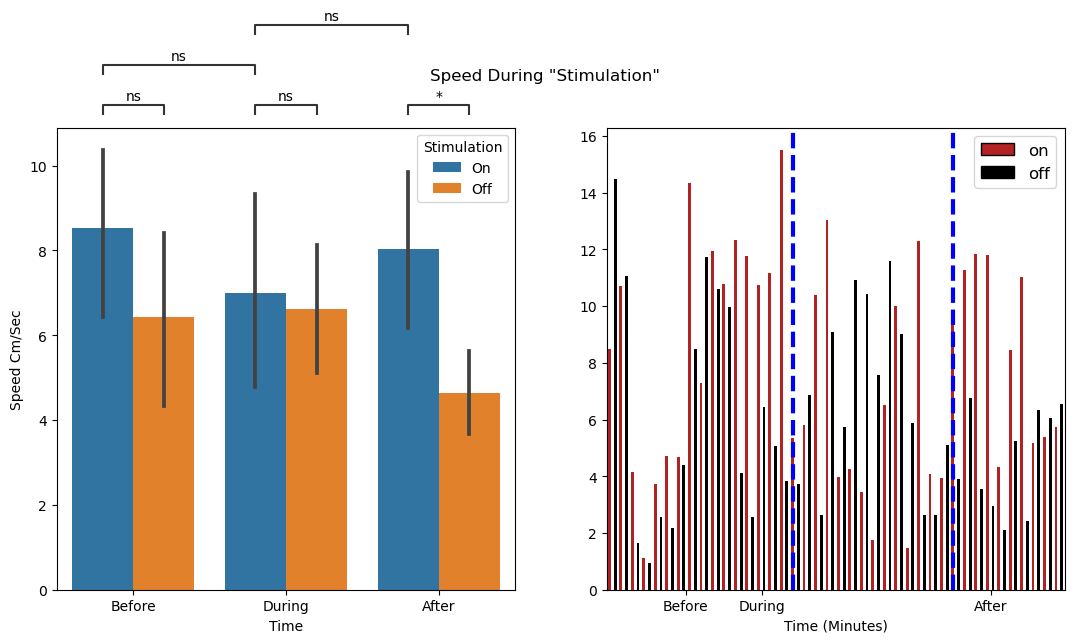

In [15]:
#For aligning possible changes in movement exactly with stimulation (doesn't make sense for OPN3)
stimulation = Graphing.duringStimulation(mouseData)

# For Multiple mice at once

In [4]:
#Generates an output report with all graphs as a PDF
for mouse in stimTimesDict.keys():
    stimTimes = [i*60*frameRate for i in stimTimesDict[mouse][0]] #Changes these measures from minutes to frames
    stimPattern = [i*frameRate for i in stimTimesDict[mouse][1]]
    
    files = os.listdir(path+mouse)
    files = [i for i in files if i.endswith('.csv')]
    for file in files:
        stimulation = file[5:-4]
        dataPath = path+mouse+'/'+file
        savePath = path+mouse+'/'+conditionDict[mouse]+'_'+stimulation+'_Report.pdf'
        extract = PreProcess(dataPath,pixelLength,frameRate,cutoffProb,relevantLabels,stimTimes,distanceThresh,mouse,stimPattern)
        Graphing.generateReport(extract,savePath)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Right_During vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.300e+01
Left_Before vs. Left_During: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
Left_During vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:6.857e-01 U_stat=1.000e+01
Right_Before vs. Right_During: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=7.000e+00
Right_Before vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:8.857e-01 U_stat=9.000e+00
Left_Before vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.143e-01 U_stat=1.400e+01
Left_After vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.465e-01 U_stat=2.500e+00
Left_Before vs. Right_Before: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=7.500e+00
Left_During vs. R

C:\Users\rafip\Desktop\OVGU\Lindoscope\2023\Graphing.py:236: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Right_During vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=4.000e+00
Left_Before vs. Left_During: Mann-Whitney-Wilcoxon test two-sided, P_val:6.612e-01 U_stat=6.000e+00
Left_During vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=8.000e+00
Right_Before vs. Right_During: Mann-Whitney-Wilcoxon test two-sided, P_val:2.857e-02 U_stat=1.600e+01
Right_Before vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:3.429e-01 U_stat=1.200e+01
Left_Before vs. Left_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=8.000e+00
Left_After vs. Right_After: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=8.000e+00
Left_Before vs. Right_Before: Mann-Whitney-Wilcoxon test two-sided, P_val:1.102e-01 U_stat=2.000e+00
Left_During vs. R